# cadCAD Experiment
Over 500 timesteps, money comes in to the system each timestep and is distributed to delegators according to the proportion of shares they have bought.  The share price and number are tied to a bonding curve.  

They purchase shares in the system according to their belief of the future revenue streams.

In [1]:
# if this crashes, run this:
# pip install ipython-autotime
%load_ext autotime
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("..")





time: 31 ms (started: 2021-03-25 09:21:36 -04:00)


In [2]:
# import matplotlib.pyplot as plt
# from model.run import run

# df = run()


time: 31 ms (started: 2021-03-25 09:21:36 -04:00)


In [8]:
from cadCAD_tools import profile_run

from model.psub import psubs
from model.state import genesis_state
from model.config import simulation_config
from model.config import params

TIMESTEPS = len(simulation_config[0]['T'])
SAMPLES = simulation_config[0]['N'] 
# df = run()
df = profile_run(genesis_state,
                 params,
                 psubs,
                 TIMESTEPS,
                 SAMPLES)


{'reserve': 10, 'supply': 10, 'delegators': {0: <model.model.delegator.Delegator object at 0x0000025B2282F190>}, 'period_revenue': 0, 'spot_price': 2}

[{'N': 1, 'T': range(0, 10), 'M': {'initial_reserve': 10, 'initial_supply': 10, 'expected_revenue': 7, 'owners_share': 0.25, 'arrival_rate': 0.5, 'expected_reserve_token_holdings': 25, 'delegator_estimation_noise_mean': 0, 'delegator_estimation_noise_variance': 1, 'reserve_to_revenue_token_exchange_rate': 1, 'delegator_activity_rate': 0.5, 'mininum_required_price_pct_diff_to_act': 0.02, 'risk_adjustment': 0.7, 'half_life_vesting_rate': 0.5, 'cliff_vesting_timesteps': 14, 'num_days_for_trends': 14, 'halflife': 0.5, 'smoothing_factor': 0.5}, 'subset_id': 0, 'subset_window': deque([0, None], maxlen=2), 'simulation_id': 0, 'run_id': 0}]

[{'label': 'Update Vested Shares', 'policies': {}, 'variables': {'delegators': <function compute_cliff_vested_shares at 0x0000025B25891700>}}, {'label': 'Revenue Arrival Process', 'policies': {'revenue_amt'

In [9]:

from cadCAD_tools.profiling.visualizations import visualize_substep_impact

visualize_substep_impact(df, relative=True)

100%|██████████| 10/10 [00:00<00:00, 138.09it/s]


time: 1.06 s (started: 2021-03-25 09:21:05 -04:00)


In [10]:
df

reserve    supply                                         delegators  \
0    10.000000  10.00000  {0: <model.model.delegator.Delegator object at...   
1    10.000000  10.00000  {0: <model.model.delegator.Delegator object at...   
2    10.000000  10.00000  {0: <model.model.delegator.Delegator object at...   
3    10.000000  10.00000  {0: <model.model.delegator.Delegator object at...   
4    10.000000  10.00000  {0: <model.model.delegator.Delegator object at...   
..         ...       ...                                                ...   
146  97.658876  31.25042  {0: <model.model.delegator.Delegator object at...   
147  97.658876  31.25042  {0: <model.model.delegator.Delegator object at...   
148  97.658876  31.25042  {0: <model.model.delegator.Delegator object at...   
149  97.658876  31.25042  {0: <model.model.delegator.Delegator object at...   
150  97.658876  31.25042  {0: <model.model.delegator.Delegator object at...   

     period_revenue  spot_price      run_time  simulation  subset  run  \
0          0.000000    2.000000           NaN           0       0    1   
1          0.000000    2.000000  1.616678e+09           0       0    1   
2          0.000000    2.000000  1.616678e+09           0       0    1   
3          0.000000    2.000000  1.616678e+09           0       0    1   
4         22.203529    2.000000  1.616678e+09           0       0    1   
..              ...         ...           ...         ...     ...  ...   
146        6.995696    6.250084  1.616678e+09           0       0    1   
147        6.995696    6.250084  1.616678e+09           0       0    1   
148        6.995696    6.250084  1.616678e+09           0       0    1   
149        6.995696    6.250084  1.616678e+09           0       0    1   
150        6.995696    6.250084  1.616678e+09           0       0    1   

     substep  ...  delegator_estimation_noise_variance  \
0          0  ...                                    1   
1          1  ...                                    1   
2          2  ...                                    1   
3          3  ...                                    1   
4          4  ...                                    1   
..       ...  ...                                  ...   
146       11  ...                                    1   
147       12  ...                                    1   
148       13  ...                                    1   
149       14  ...                                    1   
150       15  ...                                    1   

     reserve_to_revenue_token_exchange_rate  delegator_activity_rate  \
0                                         1                      0.5   
1                                         1                      0.5   
2                                         1                      0.5   
3                                         1                      0.5   
4                                         1                      0.5   
..                                      ...                      ...   
146                                       1                      0.5   
147                                       1                      0.5   
148                                       1                      0.5   
149                                       1                      0.5   
150                                       1                      0.5   

     mininum_required_price_pct_diff_to_act  risk_adjustment  \
0                                      0.02              0.7   
1                                      0.02              0.7   
2                                      0.02              0.7   
3                                      0.02              0.7   
4                                      0.02              0.7   
..                                      ...              ...   
146                                    0.02              0.7   
147                                    0.02              0.7   
148                            

time: 125 ms (started: 2021-03-25 09:21:06 -04:00)


# Revenue coming in each period.  
## Mean is a parameter, currently 7
## It's exponentially distributed.

<AxesSubplot:>

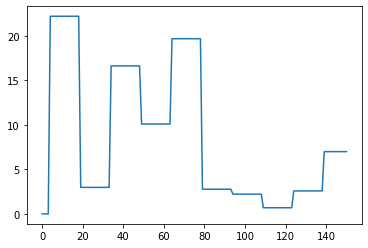

time: 766 ms (started: 2021-03-25 09:21:06 -04:00)


In [11]:
df.period_revenue.plot()

# Cumulative Claimed Rewards
This shows that the cumulative rewards continues to rise even though each delegator eventually leaves the system and their rewards become fixed.  They are of similar heights (ie. same rewards) because they all use the same policies to join and leave.

In [12]:
import pandas as pd
df1 = df.reset_index().delegators

delegator_revenue_token_holdings = {}
delegator_shares = {}
timestep = 0
for delegator_dict in df1:
    for delegator_id, delegator in delegator_dict.items():
        if delegator_id not in delegator_revenue_token_holdings:
            delegator_revenue_token_holdings[delegator_id] = {}
            delegator_shares[delegator_id] = {}
        delegator_revenue_token_holdings[delegator_id][timestep] = delegator.revenue_token_holdings
        delegator_shares[delegator_id][timestep] = delegator.shares
        
    timestep += 1

time: 94 ms (started: 2021-03-25 09:21:07 -04:00)


# Shares broken down by Delegator

In [13]:


df_plot = pd.DataFrame(delegator_shares)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Shares Owned By Delegators')
plt.xlabel('Epoch Number')
plt.ylabel('Delegator Shares')

NameError: name 'plt' is not defined

# Cumulative Revenue Token Holdings



Text(0, 0.5, 'Revenue Token Holdings')

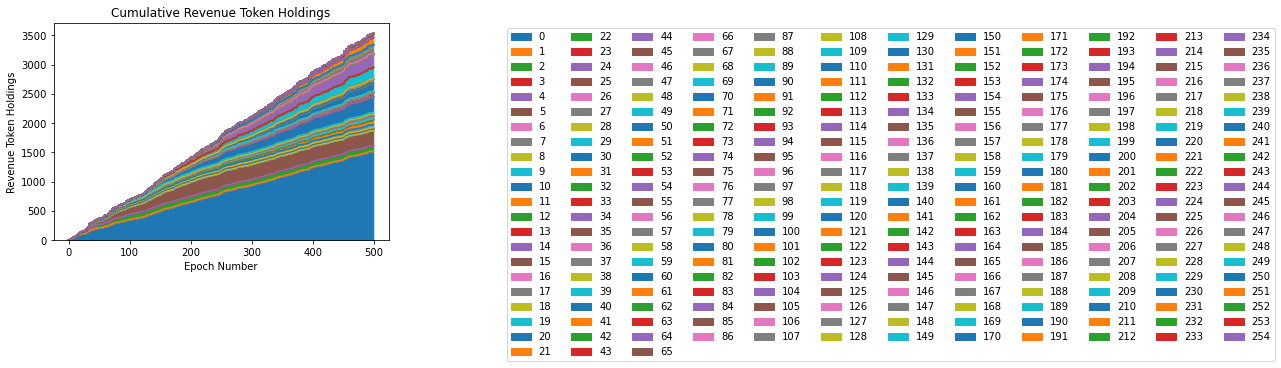

time: 11.3 s (started: 2021-03-24 13:08:27 -04:00)


In [6]:
df_plot = pd.DataFrame(delegator_revenue_token_holdings)
df_plot.plot(kind='area')
plt.gca().legend(loc=9, bbox_to_anchor=(2.5, 1), ncol=12)
plt.title('Cumulative Revenue Token Holdings')
plt.xlabel('Epoch Number')
plt.ylabel('Revenue Token Holdings')

Exploratory data analysis

In [7]:
df['shareholders'] = df.delegators.apply(lambda x: [k for k in x.keys() if x[k].shares>0] )

time: 187 ms (started: 2021-03-24 13:08:39 -04:00)


In [8]:
df['shares'] = df.delegators.apply(lambda x: [x[k].shares for k in x.keys() if x[k].shares>0] )

time: 281 ms (started: 2021-03-24 13:08:39 -04:00)


In [9]:
# cannot currently do this but i want to for plotting purposes
df['private_prices'] = df.delegators.apply(lambda x: [x[k].private_prices for k in x.keys()] )

time: 94 ms (started: 2021-03-24 13:08:39 -04:00)


In [10]:
df_list = []
for t in range(len(df)):
    temp_df = pd.DataFrame({'shareholder':df.shareholders.iloc[t] , 'shares':df.shares.iloc[t]})
    temp_df['Epoch Number'] = t

    df_list.append(temp_df)

shareholder_df = pd.concat(df_list)

time: 593 ms (started: 2021-03-24 13:08:39 -04:00)


In [11]:
shareholder_df

shareholder     shares  Epoch Number
0             0  10.000000             0
0             0  10.000000             1
0             0  20.000000             2
1             1   2.002006             2
0             0  20.000000             3
..          ...        ...           ...
13           97   3.337023           499
14          111   3.692430           499
15          115   2.252328           499
16          241   0.038642           499
17          252   1.821817           499

[7623 rows x 3 columns]

time: 62 ms (started: 2021-03-24 13:08:40 -04:00)


# Price per share

<AxesSubplot:>

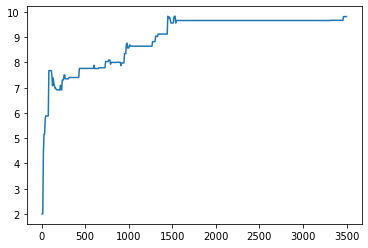

time: 297 ms (started: 2021-03-24 13:08:40 -04:00)


In [12]:
df.spot_price.plot()

In [13]:
df['period_revenue_per_share'] = df.period_revenue/df.supply

time: 62 ms (started: 2021-03-24 13:08:40 -04:00)


# Revenue per share 

<AxesSubplot:>

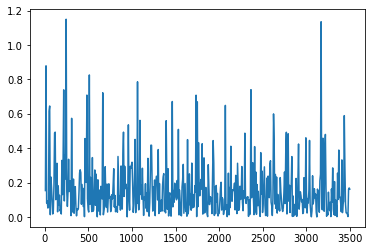

time: 328 ms (started: 2021-03-24 13:08:40 -04:00)


In [14]:
df.period_revenue_per_share.plot()

# Estimated Share Valuation

In [15]:
#estimated share valuation
risk_adj = .7 #if agents get their own param then there exists an estimated value of this system level param
discount_factor = .95 #if agents get their own param there exist an estimated value of this systel level param

df['share_valuation'] = df.spot_price * risk_adj + df.period_revenue_per_share / (1 - discount_factor)
df['ewm_share_valuation'] = df.share_valuation.ewm(halflife = 10).mean()

time: 63 ms (started: 2021-03-24 13:08:41 -04:00)


<AxesSubplot:xlabel='timestep'>

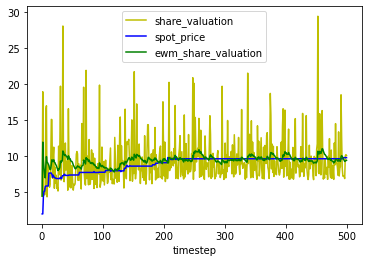

time: 390 ms (started: 2021-03-24 13:08:41 -04:00)


In [16]:
df[['share_valuation', 'spot_price', 'ewm_share_valuation', 'timestep']].plot(x='timestep', color='ybg')

In [17]:
df.columns

Index(['reserve', 'supply', 'delegators', 'period_revenue', 'spot_price',
       'simulation', 'subset', 'run', 'substep', 'timestep', 'shareholders',
       'shares', 'private_prices', 'period_revenue_per_share',
       'share_valuation', 'ewm_share_valuation'],
      dtype='object')

time: 62 ms (started: 2021-03-24 13:08:41 -04:00)


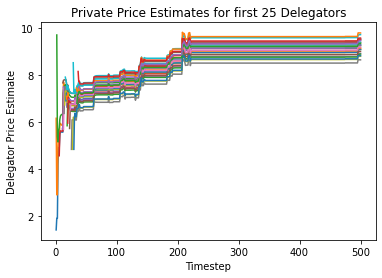

time: 312 ms (started: 2021-03-24 13:08:41 -04:00)


In [18]:
import matplotlib.pylab as plt

for i in range(0,25):
   
    d = df['private_prices'][3500][i]

    lists = sorted(d.items()) # sorted by key, return a list of tuples

    x, y = zip(*lists) # unpack a list of pairs into two tuples

    plt.plot(x, y)
plt.title('Private Price Estimates for first 25 Delegators')
plt.ylabel('Delegator Price Estimate')
plt.xlabel('Timestep')

plt.show()